In [386]:
import pandas as pd

In [387]:
df = pd.read_csv('DSGames/Games.csv')

In [388]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [390]:
df[df['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [392]:
df.drop(df.index[659],inplace = True)
df.drop(df.index[14245],inplace = True)

In [393]:
df['Name'].isnull().sum()

0

In [394]:
df.drop(['Developer','Rating'],axis = 1, inplace = True)

In [395]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0


In [396]:
df['Critic_Score'] = df['Critic_Score']*0.1

In [397]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN


In [398]:
df.rename(columns = {'Year_of_Release':'Year'}, inplace = True)
df.rename(columns = {'NA_Sales':'NA'}, inplace = True)
df.rename(columns = {'EU_Sales':'EU'}, inplace = True)
df.rename(columns = {'JP_Sales':'JP'}, inplace = True)
df.rename(columns = {'Other_Sales':'Other'}, inplace = True)
df.rename(columns = {'Global_Sales':'Global'}, inplace = True)

In [399]:
df

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN


In [400]:
df[df['Name'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count


In [401]:
df


,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,7.6,51.0,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.2,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,73.0,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN


In [402]:
df.drop(['Critic_Count','User_Count'], axis = 1, inplace = True)

In [403]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,User_Score
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN


In [404]:
import seaborn as sb

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Global'>

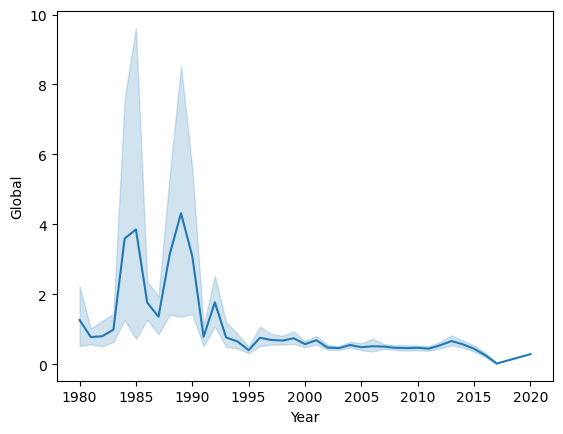

In [405]:
sb.lineplot(x = 'Year', y = 'Global', data = df)

In [406]:
df_1 = pd.melt(df, id_vars = 'Year',var_name = 'Sales', value_name = 'Region')

In [407]:
df_1

,Year,Sales,Region
0,2006.0,Name,Wii Sports
1,1985.0,Name,Super Mario Bros.
2,2008.0,Name,Mario Kart Wii
3,2009.0,Name,Wii Sports Resort
4,1996.0,Name,Pokemon Red/Pokemon Blue
...,...,...,...
183882,2016.0,User_Score,NaN
183883,2006.0,User_Score,NaN
183884,2016.0,User_Score,NaN
183885,2003.0,User_Score,NaN


In [408]:
len(df_1)

183887

sb.replot(x = 'Year', y = 'Global', data = df, hue = df_1)

In [409]:
df_02 = df[['Year','NA', 'EU', 'JP', 'Other']]

In [410]:
df_03= df.groupby(['Year'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()

In [411]:
df_1 = pd.melt(df_03, id_vars = 'Year',var_name = 'Region', value_name = 'Sales')

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


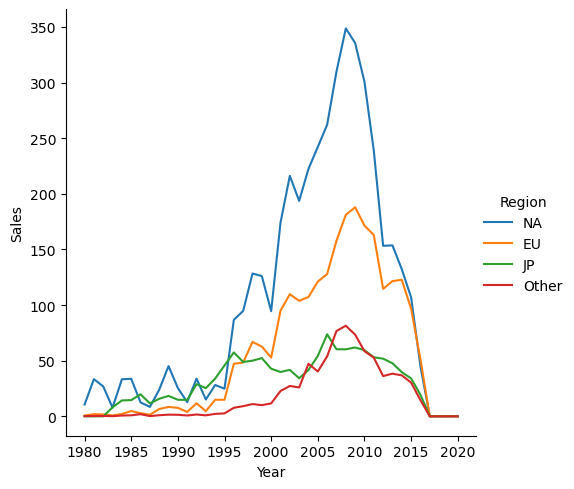

In [412]:
sns.relplot(x = 'Year', y = 'Sales', data = df_1, hue = 'Region', kind='line')

In [438]:
a = df.groupby(['Genre','Year'])[['Global']].sum().reset_index()

In [416]:
len(a)

390

In [417]:
a

,Genre,Year,Global
0,Action,1980.0,0.34
1,Action,1981.0,14.84
2,Action,1982.0,6.52
3,Action,1983.0,2.86
4,Action,1984.0,1.85
...,...,...,...
385,Strategy,2012.0,3.27
386,Strategy,2013.0,6.09
387,Strategy,2014.0,0.99
388,Strategy,2015.0,1.84


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Global'>

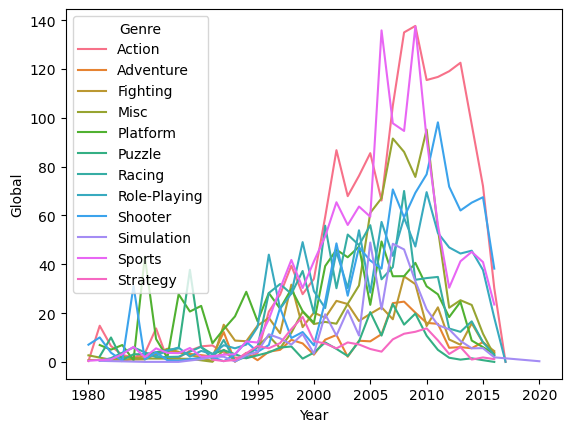

In [418]:
sb.lineplot(data=a,  x="Year", y = 'Global',hue="Genre" )

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

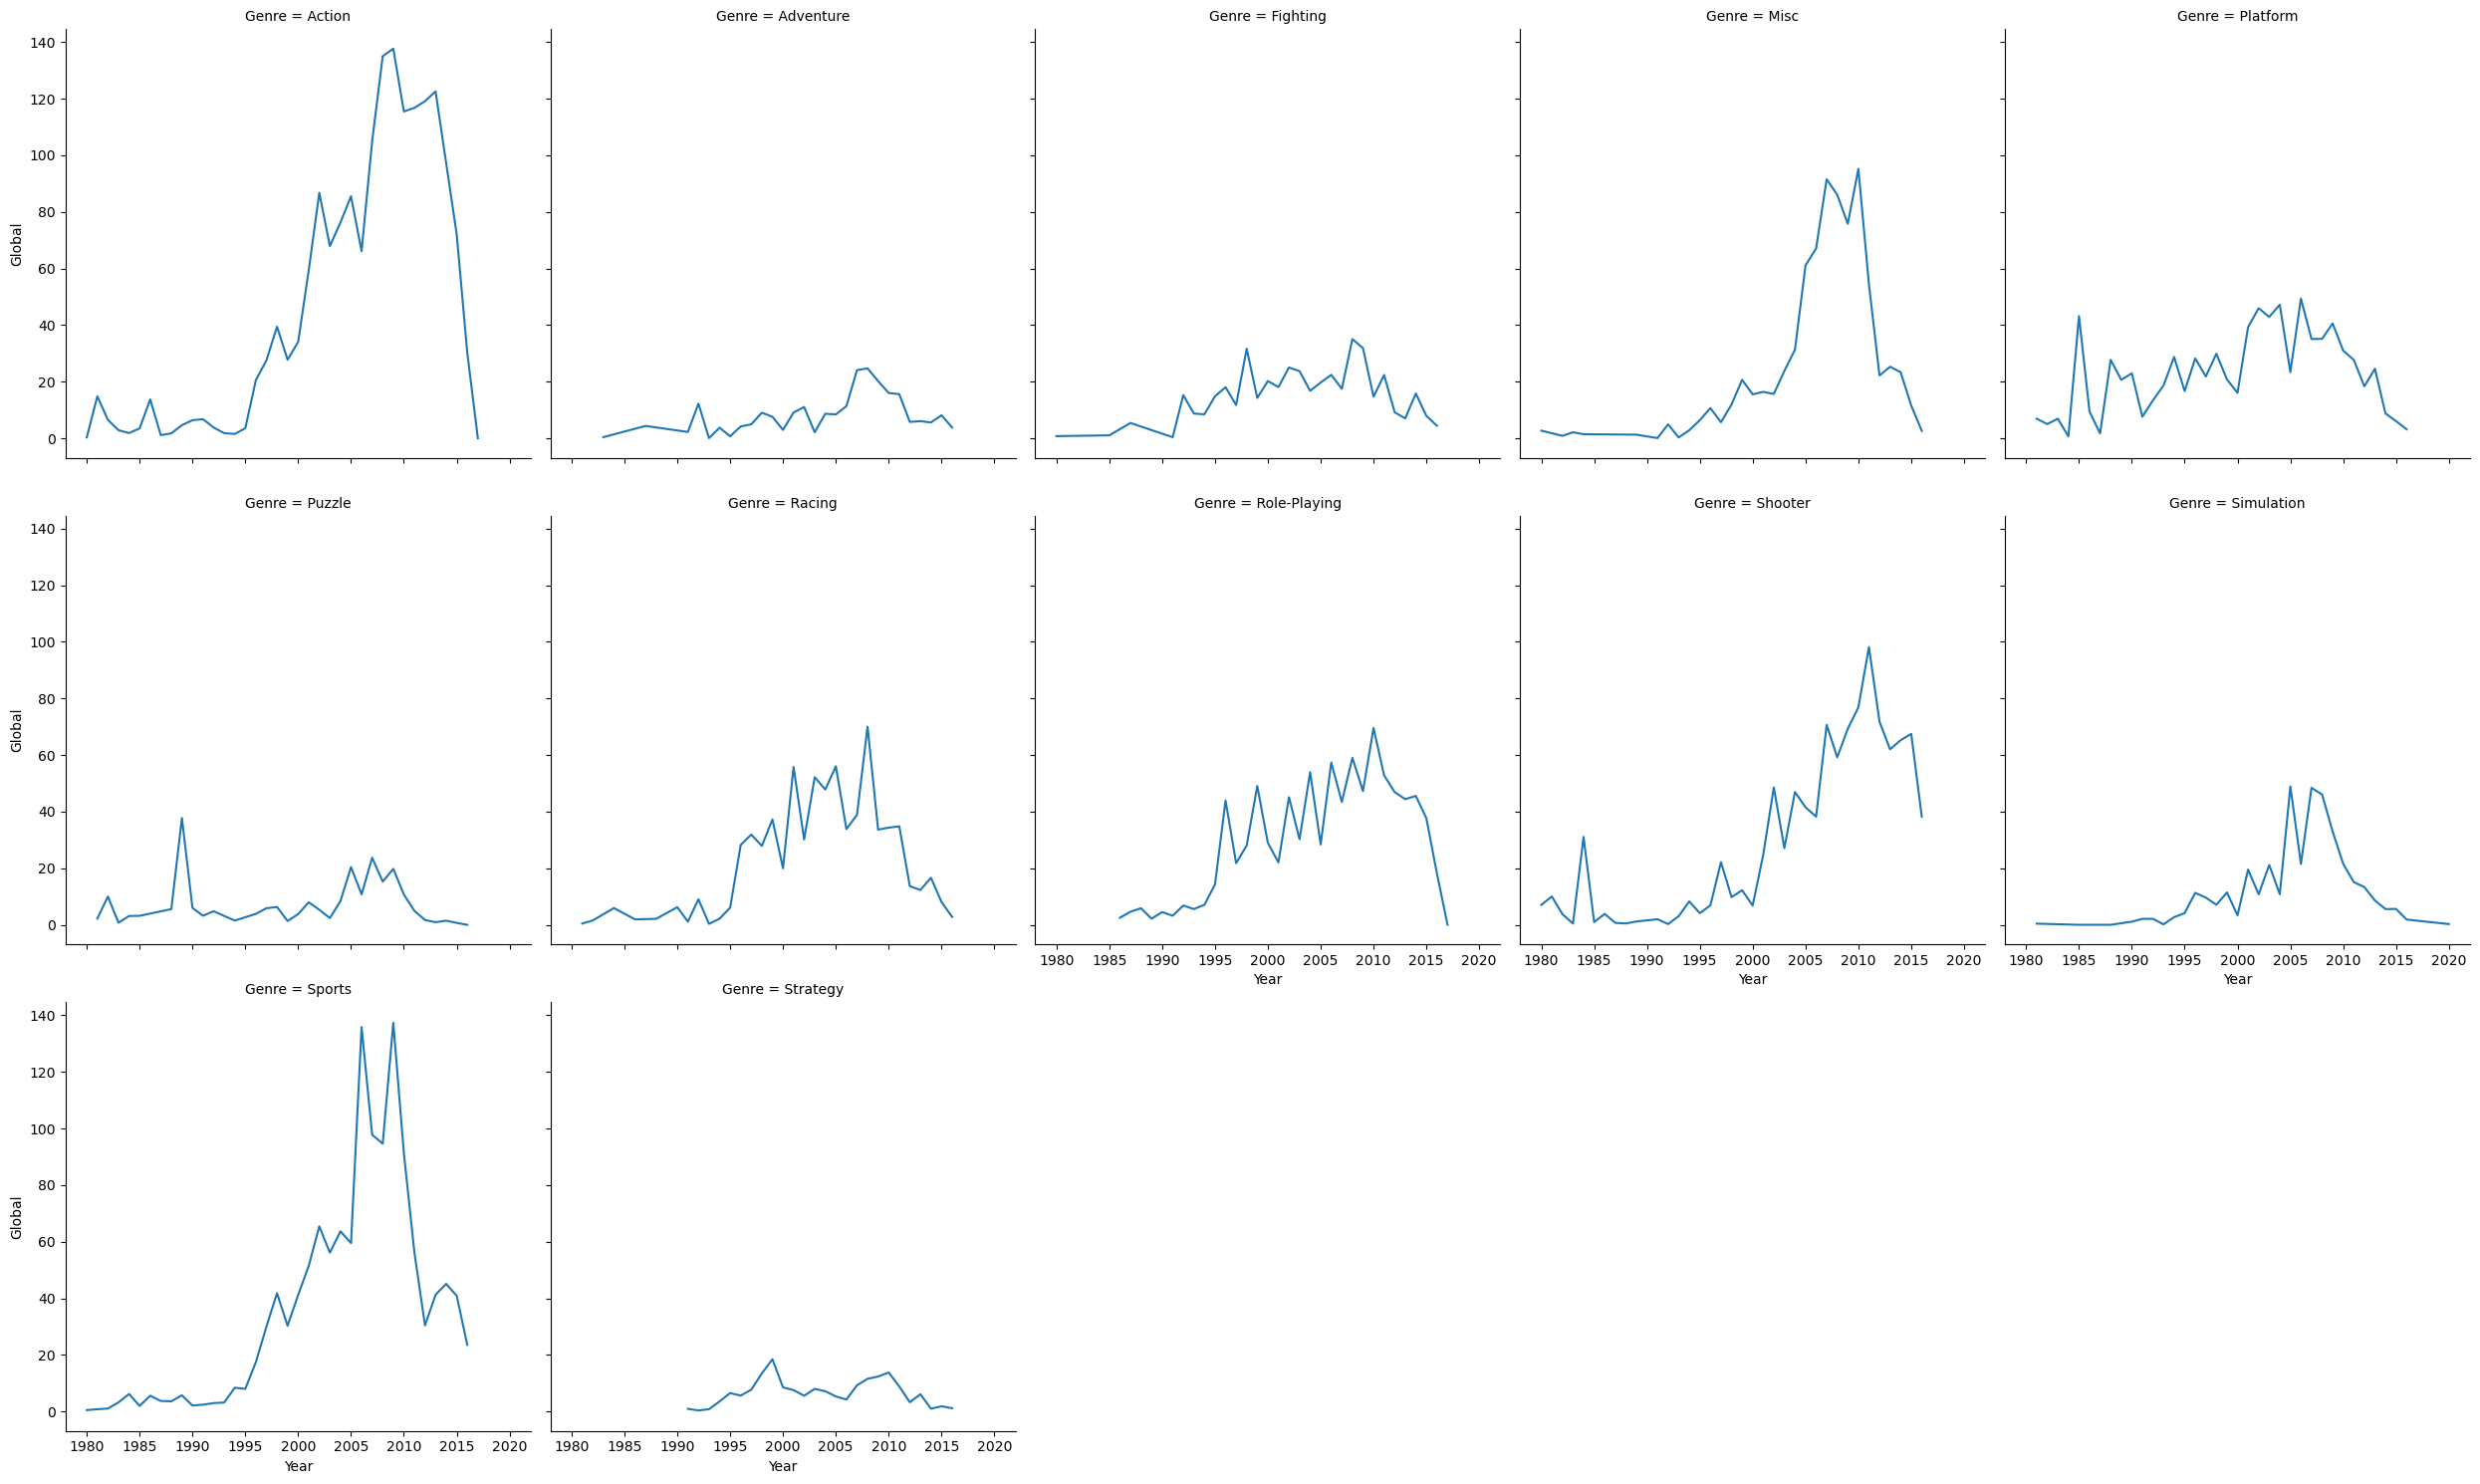

In [447]:

sb.relplot(data=a,  x="Year", y = 'Global', col = 'Genre',kind = 'line', col_wrap=5)


In [421]:
a

,Genre,Year,Global
0,Action,1980.0,0.34
1,Action,1981.0,14.84
2,Action,1982.0,6.52
3,Action,1983.0,2.86
4,Action,1984.0,1.85
...,...,...,...
385,Strategy,2012.0,3.27
386,Strategy,2013.0,6.09
387,Strategy,2014.0,0.99
388,Strategy,2015.0,1.84


In [441]:
a_1 = df.groupby(['Platform','Year'])[['Global']].sum().reset_index()

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

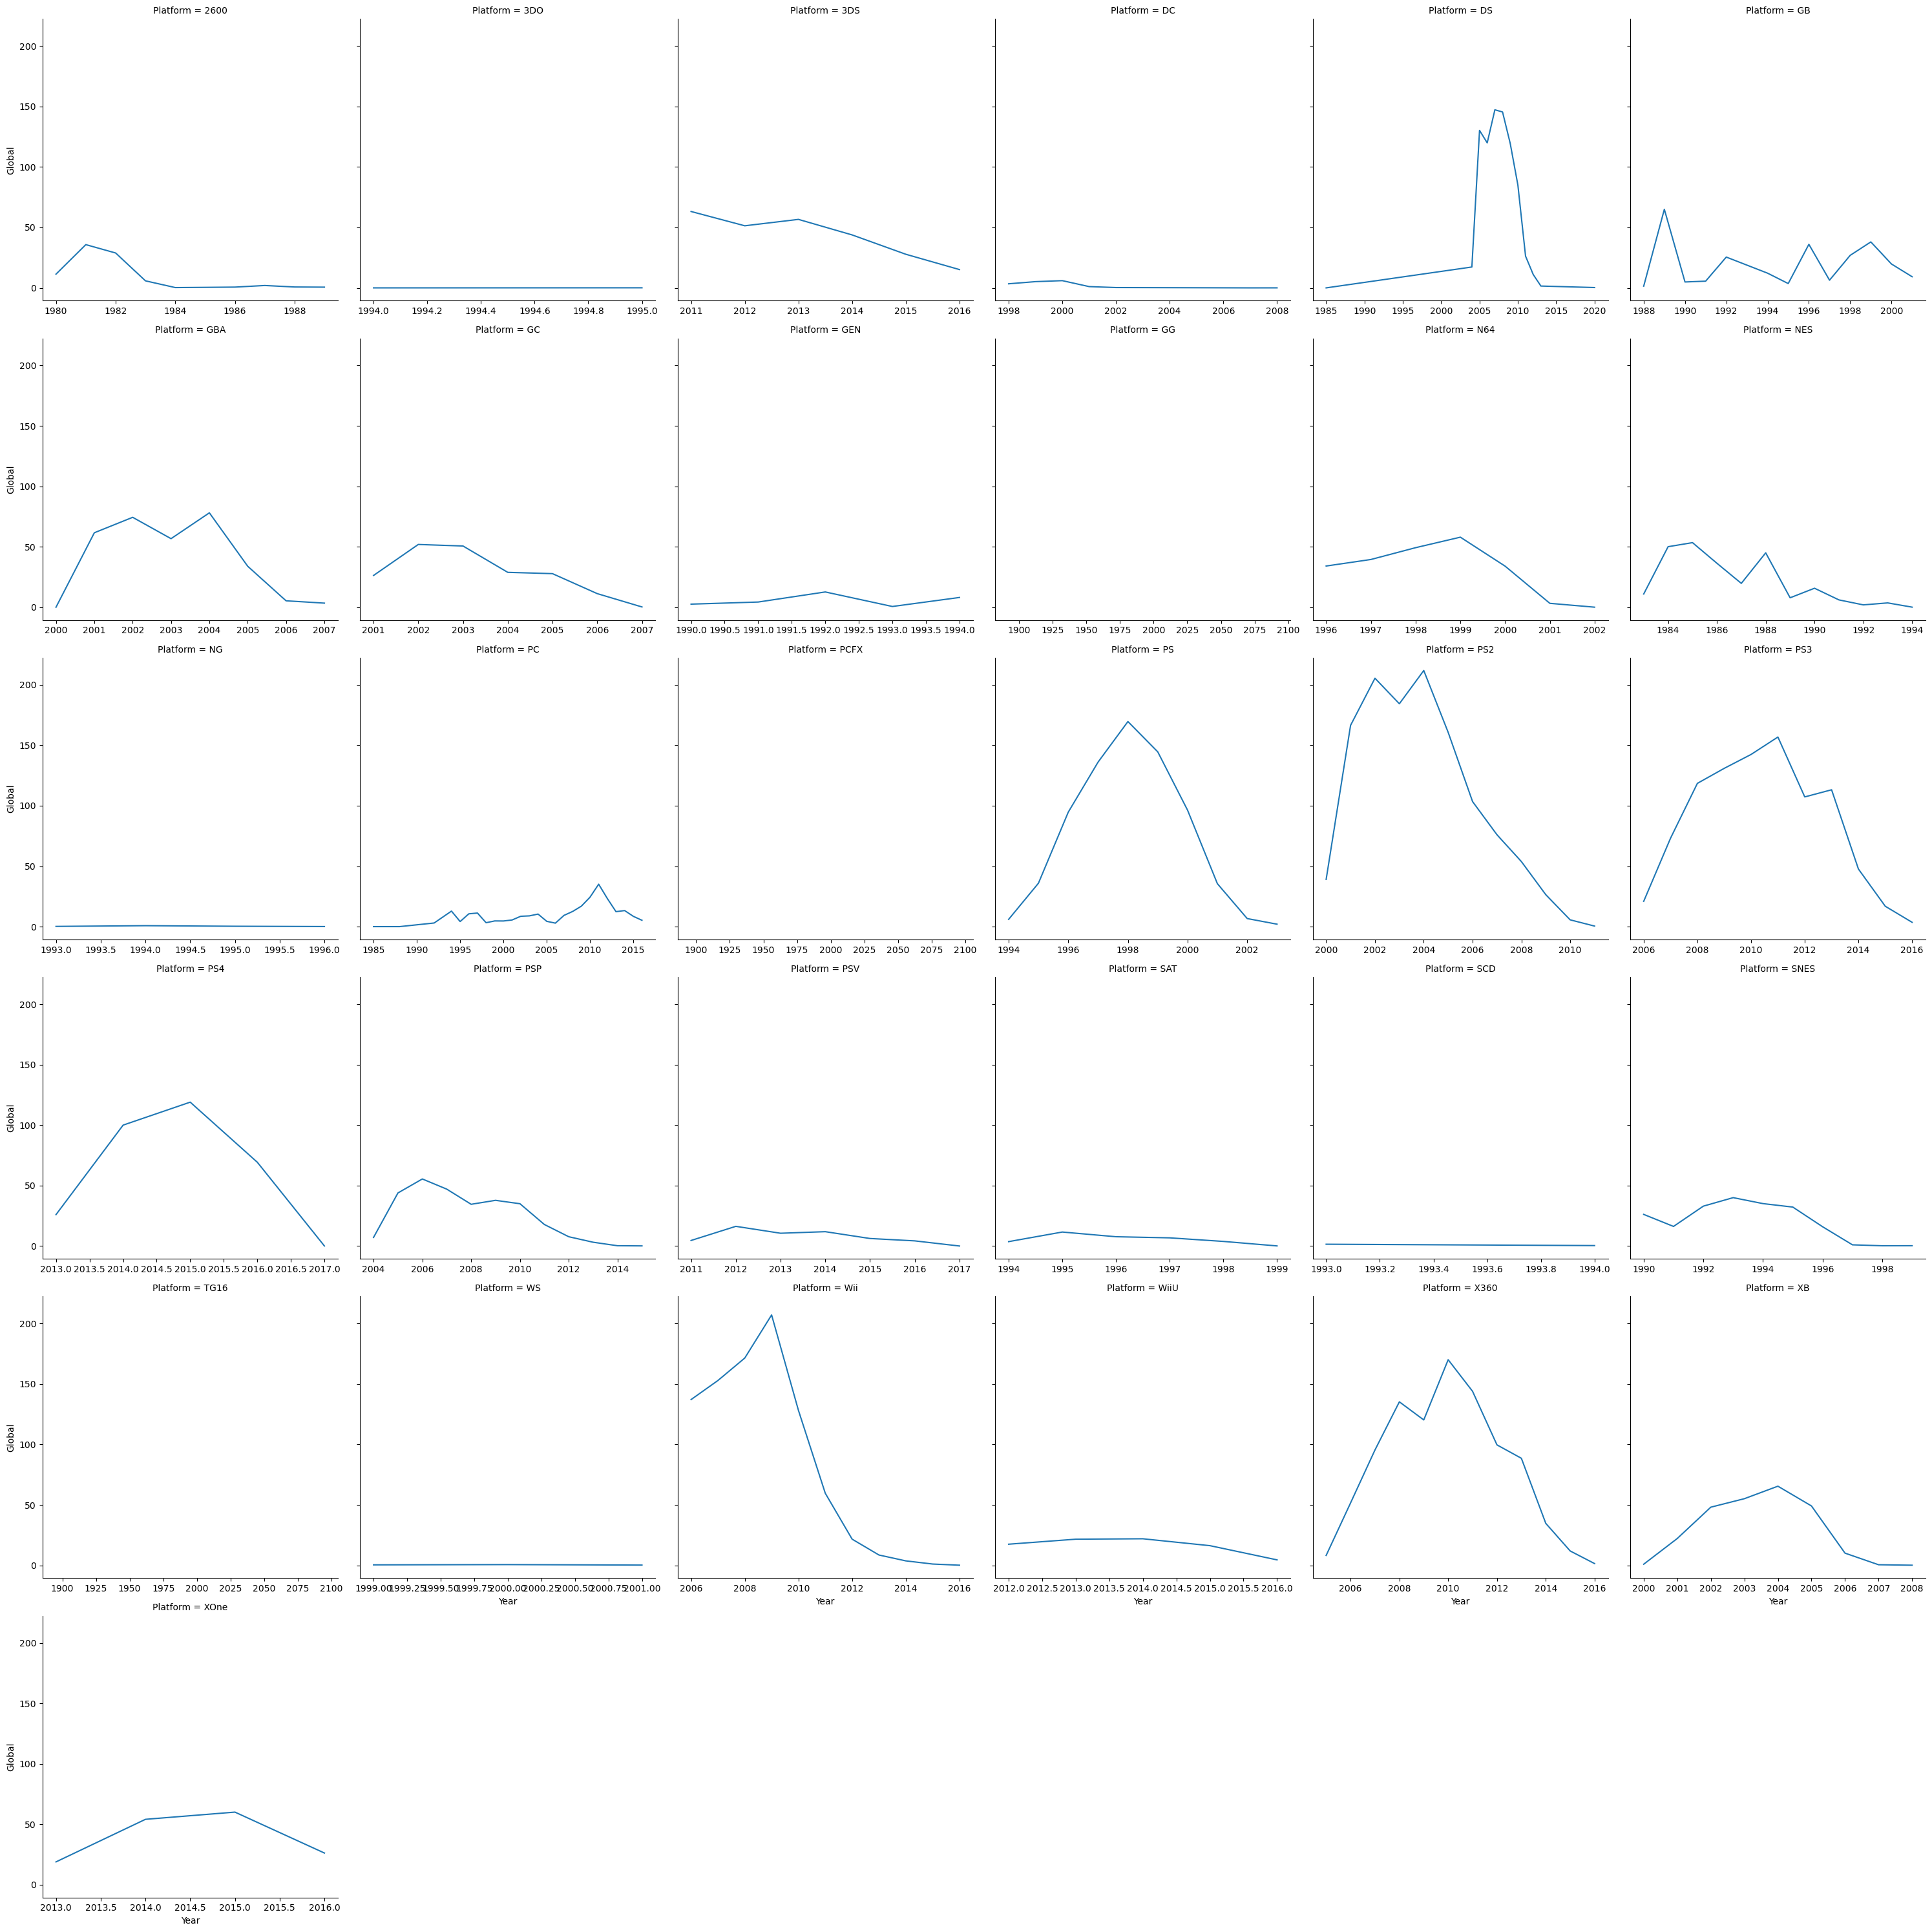

In [448]:
sb.relplot(data=a_1,  x="Year", y = 'Global', col = 'Platform',kind = 'line', col_wrap=6, facet_kws=dict(sharex=False))

In [442]:
print(a_1['Platform'].value_counts())

Platform
PC      26
GB      13
NES     12
X360    12
DS      12
PSP     12
PS2     12
Wii     11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
GC       7
PSV      7
N64      7
DC       7
SAT      6
3DS      6
WiiU     5
GEN      5
PS4      5
NG       4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
Name: count, dtype: int64


In [445]:
a,a_1

(        Genre    Year  Global
 0      Action  1980.0    0.34
 1      Action  1981.0   14.84
 2      Action  1982.0    6.52
 3      Action  1983.0    2.86
 4      Action  1984.0    1.85
 ..        ...     ...     ...
 385  Strategy  2012.0    3.27
 386  Strategy  2013.0    6.09
 387  Strategy  2014.0    0.99
 388  Strategy  2015.0    1.84
 389  Strategy  2016.0    1.15
 
 [390 rows x 3 columns],
     Platform    Year  Global
 0       2600  1980.0   11.38
 1       2600  1981.0   35.77
 2       2600  1982.0   28.86
 3       2600  1983.0    5.83
 4       2600  1984.0    0.27
 ..       ...     ...     ...
 236       XB  2008.0    0.18
 237     XOne  2013.0   18.94
 238     XOne  2014.0   54.14
 239     XOne  2015.0   60.09
 240     XOne  2016.0   26.27
 
 [241 rows x 3 columns])

,Year,Region,Sales
0,1980.0,NA,10.59
1,1981.0,NA,33.40
2,1982.0,NA,26.92
3,1983.0,NA,7.76
4,1984.0,NA,33.28
...,...,...,...
151,2014.0,Other,36.83
152,2015.0,Other,30.31
153,2016.0,Other,14.48
154,2017.0,Other,0.00


In [535]:
b = df[['Year','NA', 'EU', 'JP', 'Other']]
b1= df.groupby(['Year','Genre'])[['NA', 'EU', 'JP', 'Other']].sum().reset_index()
b2 = pd.melt(b1, id_vars = ['Year','Genre'],var_name = 'Region', value_name = 'Sales')

In [525]:
b2

,Year,Genre,Region,Sales
0,1980.0,Action,NA,0.32
1,1980.0,Fighting,NA,0.72
2,1980.0,Misc,NA,2.53
3,1980.0,Shooter,NA,6.56
4,1980.0,Sports,NA,0.46
...,...,...,...,...
1555,2016.0,Sports,Other,3.02
1556,2016.0,Strategy,Other,0.07
1557,2017.0,Action,Other,0.00
1558,2017.0,Role-Playing,Other,0.00


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

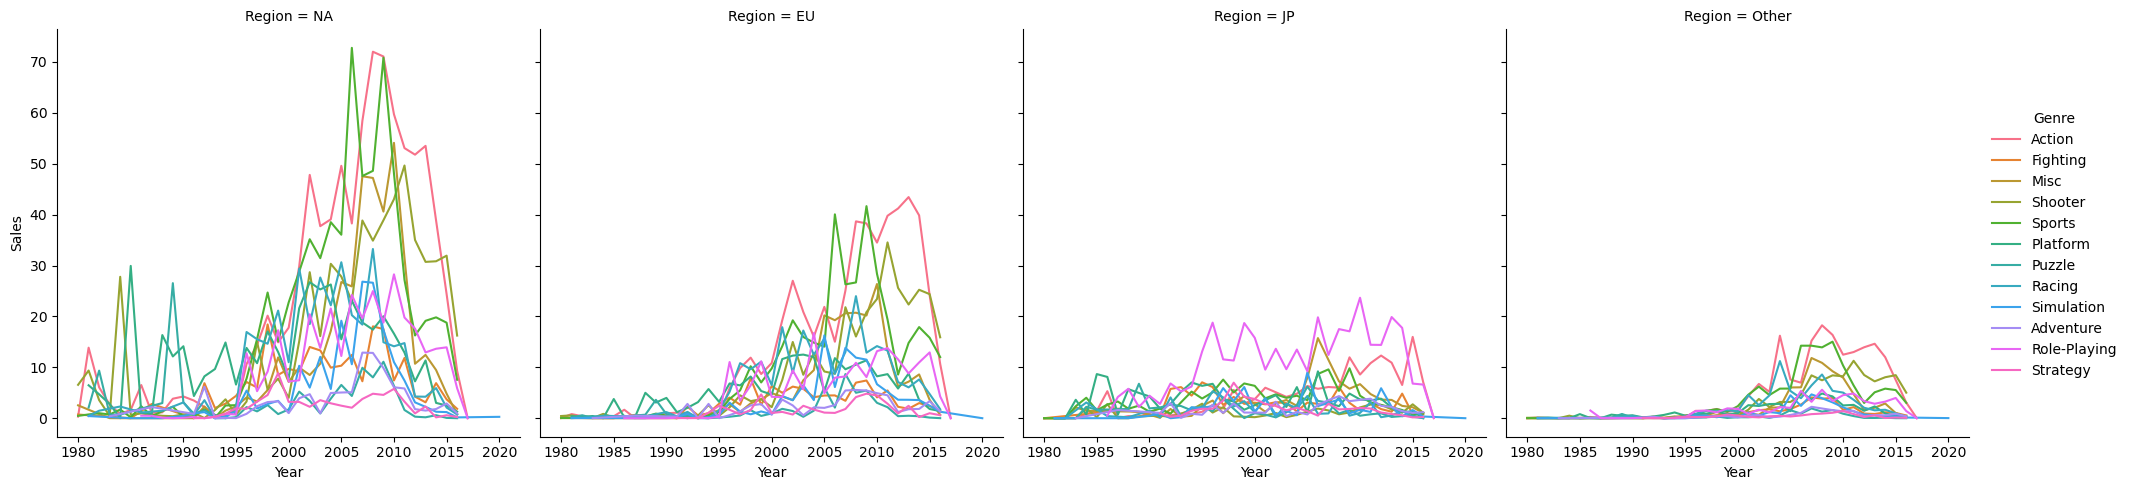

In [457]:
sns.relplot(x = 'Year', y = 'Sales', data = b2, hue = 'Genre', col = 'Region', kind='line')

In [459]:
genre = df[['Genre', 'Global']]
genre

,Genre,Global
0,Sports,82.53
1,Platform,40.24
2,Racing,35.52
3,Sports,32.77
4,Role-Playing,31.37
...,...,...
16714,Action,0.01
16715,Sports,0.01
16716,Adventure,0.01
16717,Platform,0.01


In [512]:
gr_genre = genre.groupby(['Genre'])[['Global']].sum().reset_index()

In [536]:
top_genre = gr_genre.groupby('Genre')['Global'].sum().sort_values(ascending=False).head(5).index


In [537]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], dtype='object', name='Genre')

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [538]:
b2 = b2[b2['Genre'].isin(top_genre)]

In [539]:
b2

,Year,Genre,Region,Sales
0,1980.0,Action,NA,0.32
3,1980.0,Shooter,NA,6.56
4,1980.0,Sports,NA,0.46
5,1981.0,Action,NA,13.86
6,1981.0,Platform,NA,6.47
...,...,...,...,...
1552,2016.0,Role-Playing,Other,1.40
1553,2016.0,Shooter,Other,5.02
1555,2016.0,Sports,Other,3.02
1557,2017.0,Action,Other,0.00


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

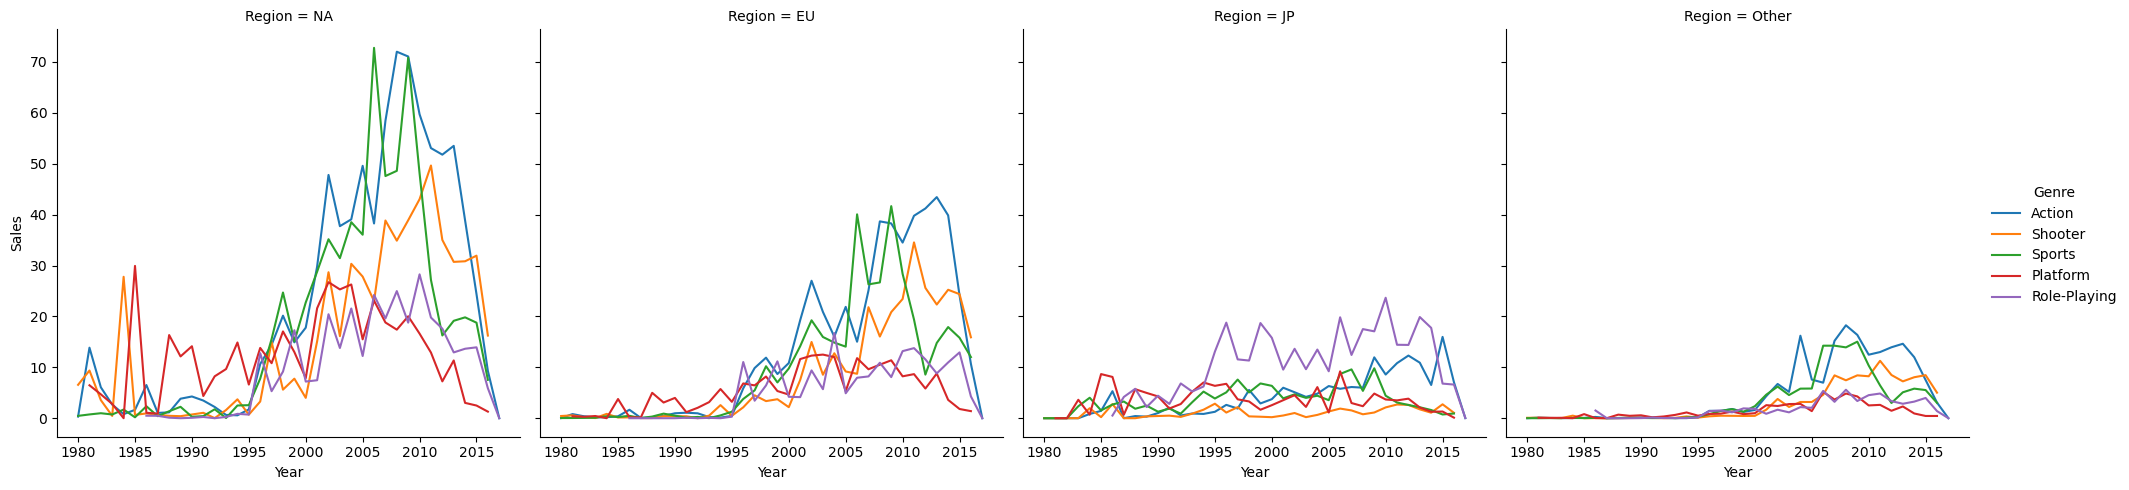

In [540]:
sns.relplot(x = 'Year', y = 'Sales', data = b2, hue = 'Genre', col = 'Region', kind='line')

""


In [578]:
cr = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]
cr

,Critic_Score,Genre,NA,EU,JP,Other
0,7.6,Sports,41.36,28.96,3.77,8.45
1,NaN,Platform,29.08,3.58,6.81,0.77
2,8.2,Racing,15.68,12.76,3.79,3.29
3,8.0,Sports,15.61,10.93,3.28,2.95
4,NaN,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...
16714,NaN,Action,0.00,0.00,0.01,0.00
16715,NaN,Sports,0.00,0.01,0.00,0.00
16716,NaN,Adventure,0.00,0.00,0.01,0.00
16717,NaN,Platform,0.01,0.00,0.00,0.00


In [596]:
critic = cr.melt( id_vars = ['Critic_Score','Genre'],var_name = 'Region', value_name = 'Sales')

In [597]:
critic

,Critic_Score,Genre,Region,Sales
0,7.6,Sports,NA,41.36
1,NaN,Platform,NA,29.08
2,8.2,Racing,NA,15.68
3,8.0,Sports,NA,15.61
4,NaN,Role-Playing,NA,11.27
...,...,...,...,...
66863,NaN,Action,Other,0.00
66864,NaN,Sports,Other,0.00
66865,NaN,Adventure,Other,0.00
66866,NaN,Platform,Other,0.00


In [599]:
top_genre

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], dtype='object', name='Genre')

In [600]:
gr_genre

,Genre,Global
0,Action,1745.27
1,Adventure,237.69
2,Fighting,447.48
3,Misc,803.18
4,Platform,828.08
5,Puzzle,243.02
6,Racing,728.90
7,Role-Playing,934.40
8,Shooter,1052.94
9,Simulation,390.42


In [606]:
critic = critic[critic['Genre'].isin(top_genre)]

C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

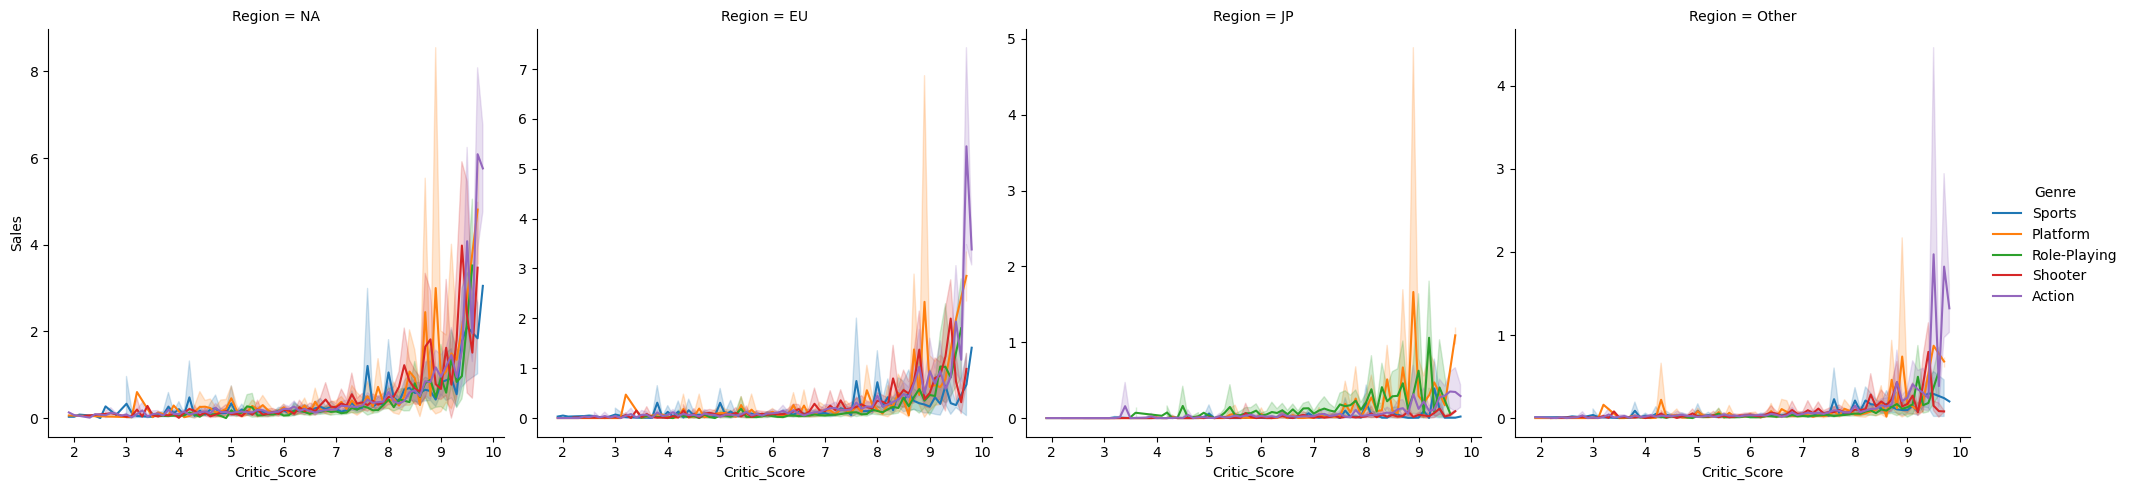

In [610]:
crit = sb.relplot(data = critic, x = 'Critic_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})

In [654]:
critic_nz = critic[critic['Sales'] > 0]

In [651]:
sc2 = critic_nz.groupby(['Region','Genre','Critic_Score'])[['Sales']].sum().reset_index()

In [652]:
sc2

,Region,Genre,Critic_Score,Sales
0,EU,Action,2.4,0.03
1,EU,Action,2.5,0.02
2,EU,Action,2.6,0.13
3,EU,Action,2.7,0.06
4,EU,Action,2.8,0.16
...,...,...,...,...
1238,Other,Sports,9.3,1.52
1239,Other,Sports,9.4,1.77
1240,Other,Sports,9.5,0.58
1241,Other,Sports,9.7,0.48


C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ystfn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

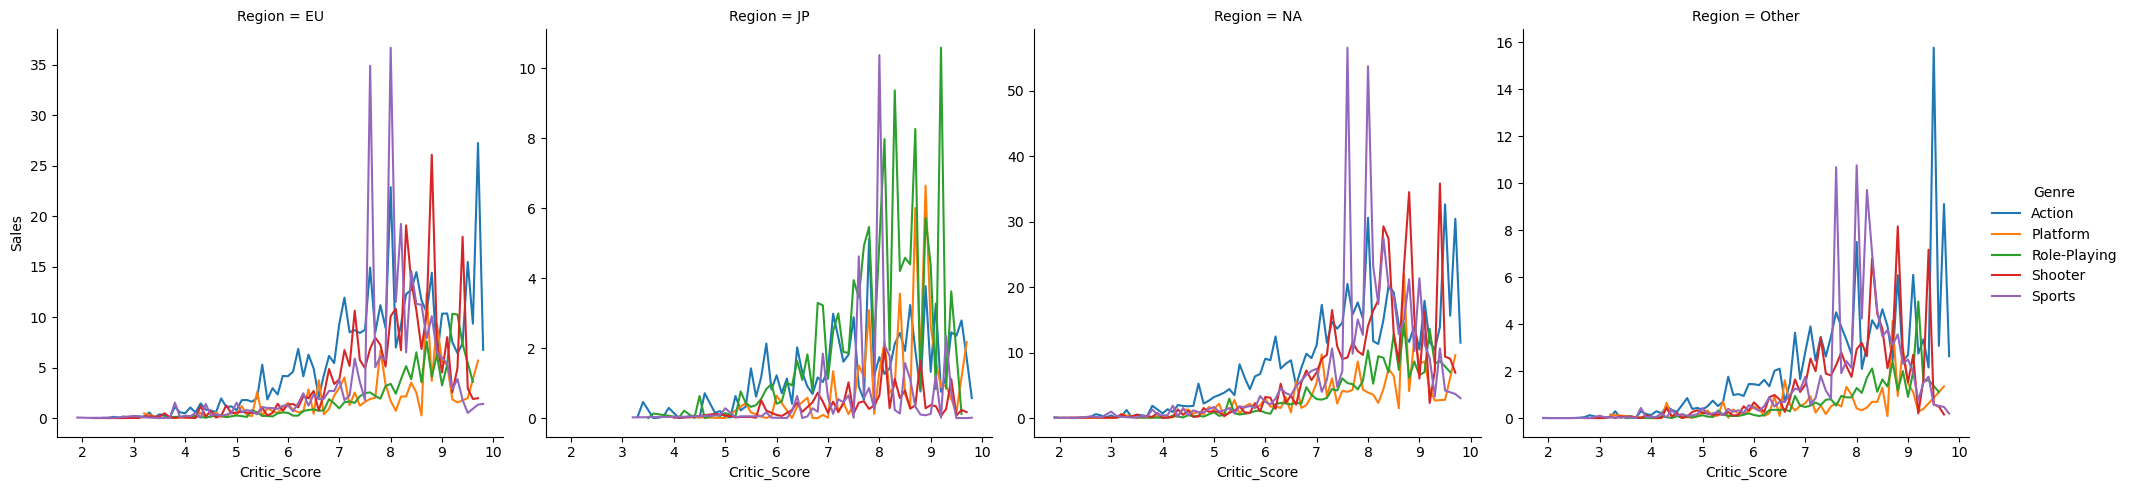

In [653]:
crit = sb.relplot(data = sc2, x = 'Critic_Score', y = 'Sales',hue  ='Genre', col = 'Region', kind = 'line', facet_kws={'sharey': False, 'sharex': True})

In [655]:
user = df[['Critic_Score', 'Genre','NA', 'EU', 'JP', 'Other']]
user

,Critic_Score,Genre,NA,EU,JP,Other
0,7.6,Sports,41.36,28.96,3.77,8.45
1,NaN,Platform,29.08,3.58,6.81,0.77
2,8.2,Racing,15.68,12.76,3.79,3.29
3,8.0,Sports,15.61,10.93,3.28,2.95
4,NaN,Role-Playing,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...
16714,NaN,Action,0.00,0.00,0.01,0.00
16715,NaN,Sports,0.00,0.01,0.00,0.00
16716,NaN,Adventure,0.00,0.00,0.01,0.00
16717,NaN,Platform,0.01,0.00,0.00,0.00
